In [2]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
from outlier_utils import createDataFrame, keepOnlyOutliers, outlier_detection,\
                is_extreme_point, calc_Precision, visualize_outliers, find_best_outliers_window

## IDX options

In [4]:
dir_path = '../results_pickle_format'

In [5]:
with open(f'{dir_path}/IDX_options.pkl', 'rb') as f:
    idx_opt = pickle.load(f)

In [9]:
with open(f'{dir_path}/n_beats_interval_28w_IDX_2007-2009.pkl', 'rb') as f:
    idx_nbeats_mapes = pickle.load(f)

In [10]:
with open(f'{dir_path}/ETS_interval_28w_IDX_2007-2009.pkl', 'rb') as f:
    idx_ETS_mapes = pickle.load(f)

In [11]:
with open(f'{dir_path}/prophet_interval_28w_IDX_2007-2009.pkl', 'rb') as f:
    idx_prophet_mapes = pickle.load(f)

In [12]:
with open(f'{dir_path}/arima_interval_28w_IDX_2007-2009.pkl', 'rb') as f:
    idx_arima_mapes = pickle.load(f)

In [13]:
idx_arima_df = createDataFrame(idx_arima_mapes, 'arima_mape')
idx_ETS_df = createDataFrame(idx_ETS_mapes, 'ETS_mape')
idx_prophet_df = createDataFrame(idx_prophet_mapes, 'prophet_mape')
idx_nbeats_df = createDataFrame(idx_nbeats_mapes, 'nbeats_mape').multiply(100) 

In [14]:
idx_arima_df.tail(3)

arima_mape
Date                  
2010-05-05   21.190408
2010-05-12   36.283697
2010-05-19   38.958859

In [15]:
idx_nbeats_df.tail(3)

nbeats_mape
Date                   
2010-05-05    25.601414
2010-05-12   104.791325
2010-05-19    64.194489

In [16]:
df = pd.concat([idx_arima_df, idx_ETS_df, idx_prophet_df, idx_nbeats_df],\
               axis=1)
df['wmape'] = (df['arima_mape'] + df['ETS_mape'] + df['prophet_mape'] + df['nbeats_mape'])/4
df.head(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2007-05-30  121.452372  61.368906     42.024935    26.402887  62.812275
2007-06-06  142.616860  33.780251     21.513987    19.579730  54.372707
2007-06-13   21.690416  50.872033     14.421881    32.053863  29.759548

In [17]:
idx_prophet_df.head(3)

prophet_mape
Date                    
2007-05-30     42.024935
2007-06-06     21.513987
2007-06-13     14.421881

In [18]:
idx_nbeats_df.head(3)

nbeats_mape
Date                   
2007-05-30    26.402887
2007-06-06    19.579730
2007-06-13    32.053863

We are try [4-20] weeks moving windows for finding if last week is outlier. 

In [19]:
arima_28w_outlier_windows = list(range(4,21))
arima_28w_best_interval, arima_28w_best_precision, arima_28w_anomalies = find_best_outliers_window(df, arima_28w_outlier_windows, idx_opt, 'arima_mape')

In [20]:
arima_28w_best_interval, arima_28w_best_precision, arima_28w_anomalies

(20,
 0.7,
 [datetime.datetime(2008, 5, 28, 0, 0),
  datetime.datetime(2008, 9, 24, 0, 0),
  datetime.datetime(2008, 10, 22, 0, 0),
  datetime.datetime(2008, 12, 3, 0, 0),
  datetime.datetime(2008, 12, 24, 0, 0),
  datetime.datetime(2008, 12, 31, 0, 0),
  datetime.datetime(2009, 5, 27, 0, 0),
  datetime.datetime(2009, 11, 25, 0, 0),
  datetime.datetime(2009, 12, 2, 0, 0),
  datetime.datetime(2009, 12, 30, 0, 0)])

In [21]:
ETS_28w_outlier_windows = list(range(4,21))
ETS_28w_best_interval, ETS_28w_best_precision, ETS_28w_anomalies = find_best_outliers_window(df, ETS_28w_outlier_windows, idx_opt, 'ETS_mape')

In [22]:
ETS_28w_best_interval, ETS_28w_best_precision, ETS_28w_anomalies

(6,
 0.7777777777777778,
 [datetime.datetime(2007, 8, 29, 0, 0),
  datetime.datetime(2007, 11, 28, 0, 0),
  datetime.datetime(2008, 3, 26, 0, 0),
  datetime.datetime(2008, 7, 30, 0, 0),
  datetime.datetime(2008, 12, 3, 0, 0),
  datetime.datetime(2009, 4, 8, 0, 0),
  datetime.datetime(2009, 5, 27, 0, 0),
  datetime.datetime(2009, 10, 14, 0, 0),
  datetime.datetime(2009, 11, 25, 0, 0)])

In [23]:
prophet_28w_outlier_windows = list(range(4,21))
prophet_28w_best_interval, prophet_28w_best_precision, prophet_28w_anomalies = find_best_outliers_window(df, prophet_28w_outlier_windows, idx_opt, 'prophet_mape')

In [24]:
prophet_28w_best_interval, prophet_28w_best_precision, prophet_28w_anomalies

(10,
 0.8,
 [datetime.datetime(2007, 8, 29, 0, 0),
  datetime.datetime(2008, 4, 30, 0, 0),
  datetime.datetime(2008, 7, 30, 0, 0),
  datetime.datetime(2008, 8, 27, 0, 0),
  datetime.datetime(2008, 10, 22, 0, 0),
  datetime.datetime(2009, 4, 29, 0, 0),
  datetime.datetime(2009, 5, 27, 0, 0),
  datetime.datetime(2009, 11, 25, 0, 0),
  datetime.datetime(2009, 12, 2, 0, 0),
  datetime.datetime(2009, 12, 30, 0, 0)])

In [25]:
nbeats_28w_outlier_windows = list(range(4,21))
nbeats_28w_best_interval, nbeats_28w_best_precision, nbeats_28w_anomalies = find_best_outliers_window(df, nbeats_28w_outlier_windows, idx_opt, 'nbeats_mape')

In [26]:
nbeats_28w_best_interval, nbeats_28w_best_precision, nbeats_28w_anomalies

(8,
 0.75,
 [datetime.datetime(2007, 8, 1, 0, 0),
  datetime.datetime(2007, 10, 24, 0, 0),
  datetime.datetime(2008, 1, 23, 0, 0),
  datetime.datetime(2008, 3, 19, 0, 0),
  datetime.datetime(2008, 7, 9, 0, 0),
  datetime.datetime(2008, 7, 16, 0, 0),
  datetime.datetime(2008, 9, 17, 0, 0),
  datetime.datetime(2008, 10, 8, 0, 0),
  datetime.datetime(2009, 4, 15, 0, 0),
  datetime.datetime(2009, 8, 19, 0, 0),
  datetime.datetime(2009, 10, 21, 0, 0),
  datetime.datetime(2010, 5, 12, 0, 0)])

In [27]:
wmape_28w_outlier_windows = list(range(4,21))
wmape_28w_best_interval, wmape_28w_best_precision, wmape_28w_anomalies = find_best_outliers_window(df, wmape_28w_outlier_windows, idx_opt, 'wmape')

In [28]:
wmape_28w_best_interval, wmape_28w_best_precision, wmape_28w_anomalies

(6,
 0.75,
 [datetime.datetime(2007, 8, 29, 0, 0),
  datetime.datetime(2007, 11, 28, 0, 0),
  datetime.datetime(2008, 3, 26, 0, 0),
  datetime.datetime(2008, 4, 30, 0, 0),
  datetime.datetime(2008, 7, 30, 0, 0),
  datetime.datetime(2008, 8, 27, 0, 0),
  datetime.datetime(2008, 12, 3, 0, 0),
  datetime.datetime(2009, 4, 8, 0, 0),
  datetime.datetime(2009, 4, 15, 0, 0),
  datetime.datetime(2009, 11, 25, 0, 0),
  datetime.datetime(2009, 12, 30, 0, 0),
  datetime.datetime(2010, 4, 7, 0, 0)])

In [29]:
df.tail(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2010-05-05   21.190408  29.474671     22.953598    25.601414  24.805023
2010-05-12   36.283697  45.509485     36.935495   104.791325  55.880001
2010-05-19   38.958859  23.016192     25.762766    64.194489  37.983076

<AxesSubplot:xlabel='Date'>

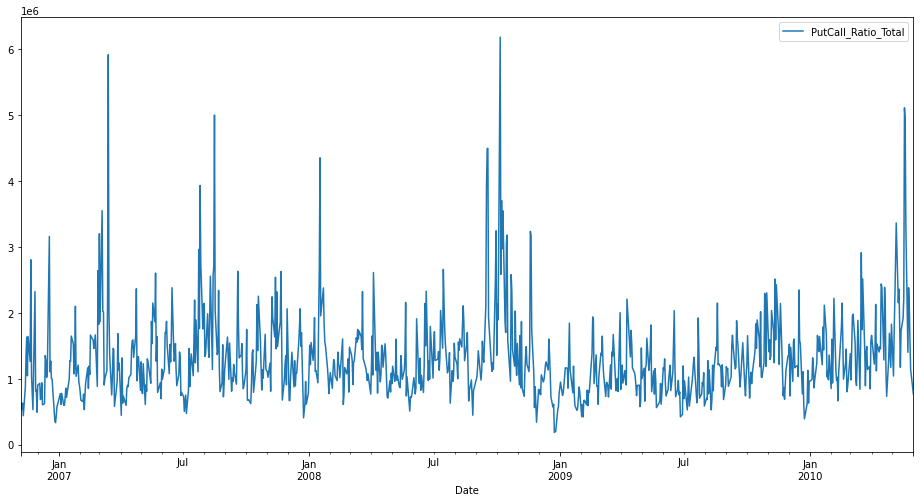

In [30]:
idx_opt[:'2010-06-01'].plot(figsize=(16,8))

In [31]:
idx_opt1 = idx_opt[:'2010-06-01']

In [32]:
arima_detection = outlier_detection(idx_opt1, arima_28w_anomalies)
ETS_detection = outlier_detection(idx_opt1, ETS_28w_anomalies)
prophet_detection = outlier_detection(idx_opt1, prophet_28w_anomalies)
nbeats_detection = outlier_detection(idx_opt1, nbeats_28w_anomalies)
average_detection = outlier_detection(idx_opt1, wmape_28w_anomalies)

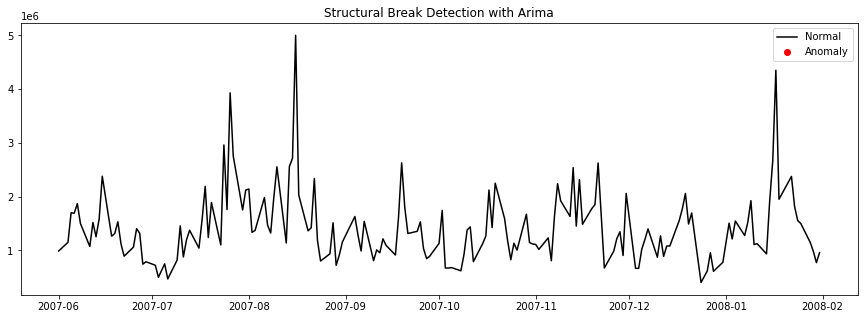

In [33]:
visualize_outliers(arima_detection, 'Arima', '2007-06-01', '2008-01-31') 

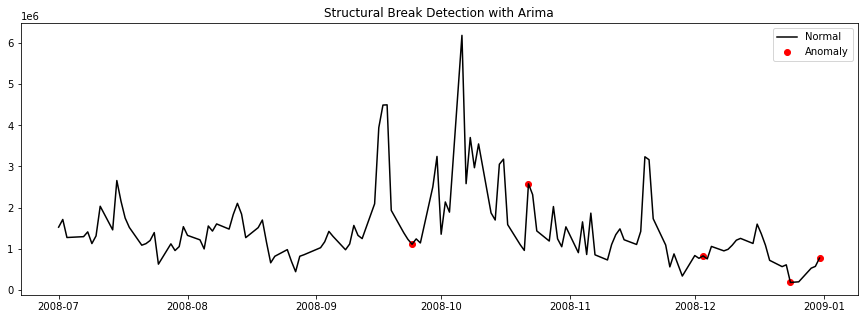

In [34]:
visualize_outliers(arima_detection, 'Arima', '2008-07-01', '2008-12-31') 

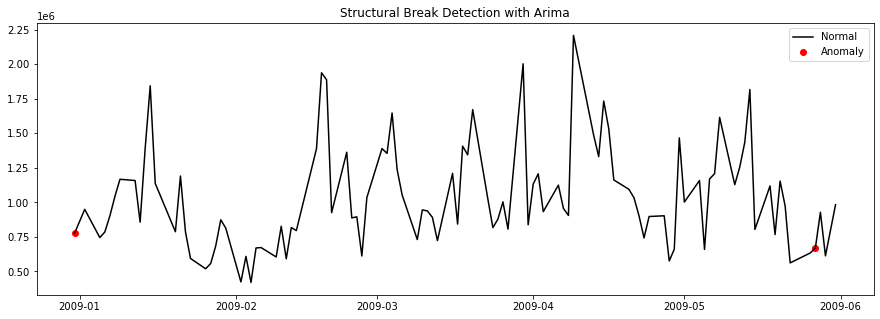

In [35]:
visualize_outliers(arima_detection, 'Arima', '2008-12-31', '2009-05-31') 

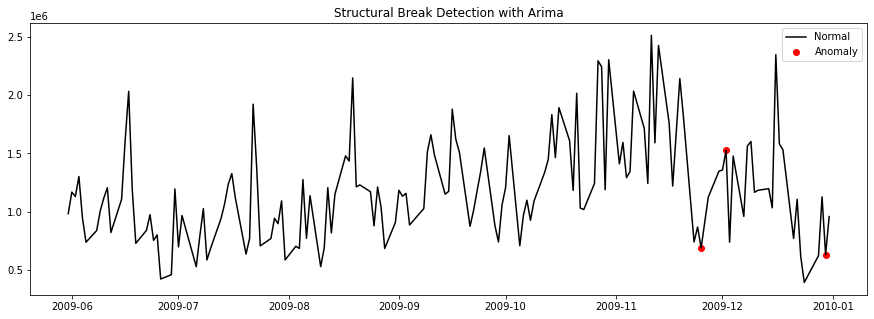

In [36]:
visualize_outliers(arima_detection, 'Arima', '2009-05-31', '2009-12-31') 

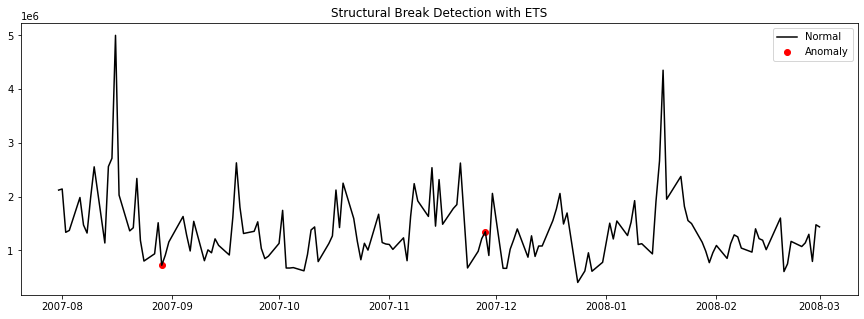

In [37]:
visualize_outliers(ETS_detection, 'ETS', '2007-07-31', '2008-03-01') 

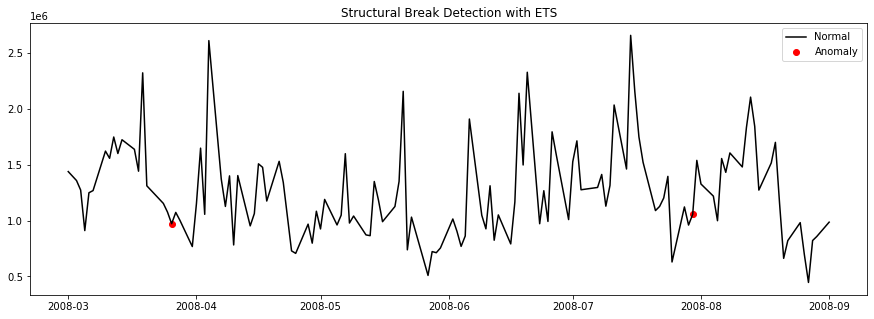

In [38]:
visualize_outliers(ETS_detection, 'ETS', '2008-03-01', '2008-09-01') 

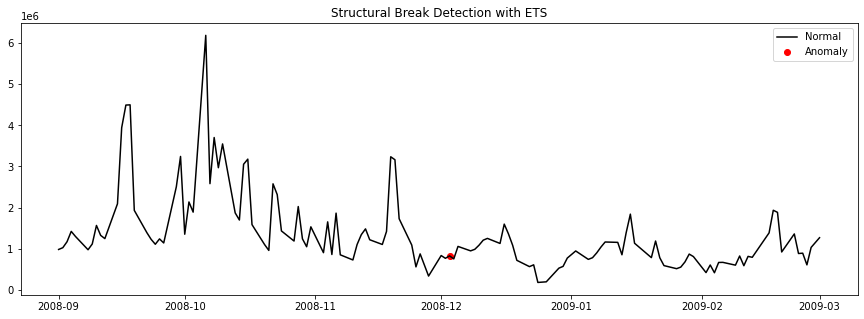

In [39]:
visualize_outliers(ETS_detection, 'ETS', '2008-09-01', '2009-03-01') 

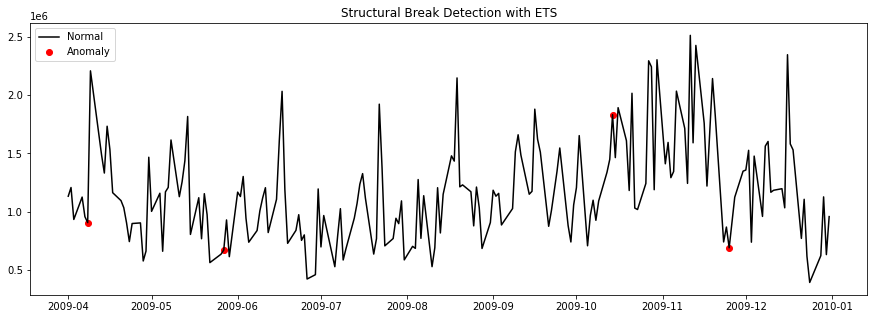

In [40]:
visualize_outliers(ETS_detection, 'ETS', '2009-04-01', '2009-12-31') 

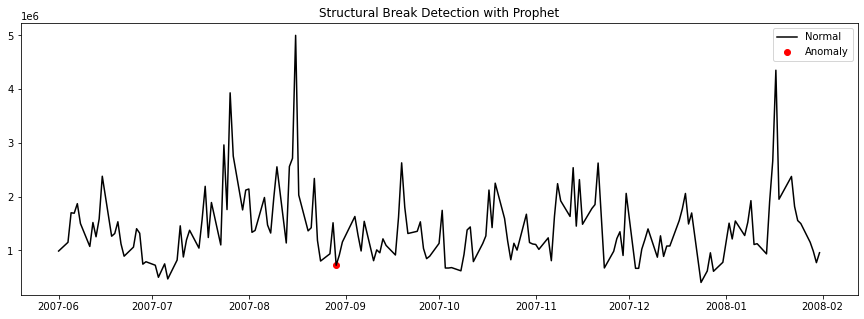

In [41]:
visualize_outliers(prophet_detection, 'Prophet', '2007-06-01', '2008-01-31') 

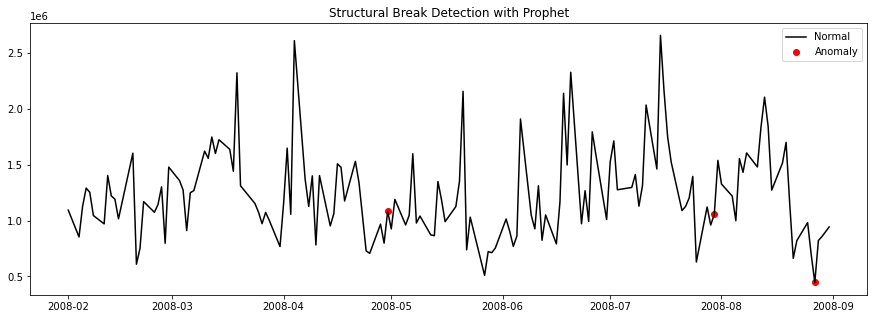

In [42]:
visualize_outliers(prophet_detection, 'Prophet', '2008-02-01', '2008-08-31') 

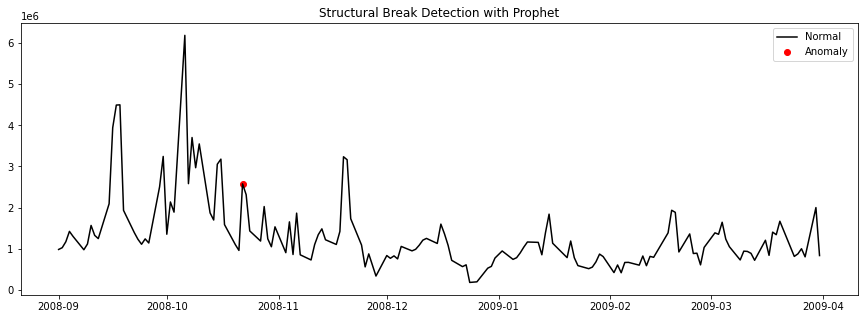

In [43]:
visualize_outliers(prophet_detection, 'Prophet', '2008-09-01', '2009-03-31') 

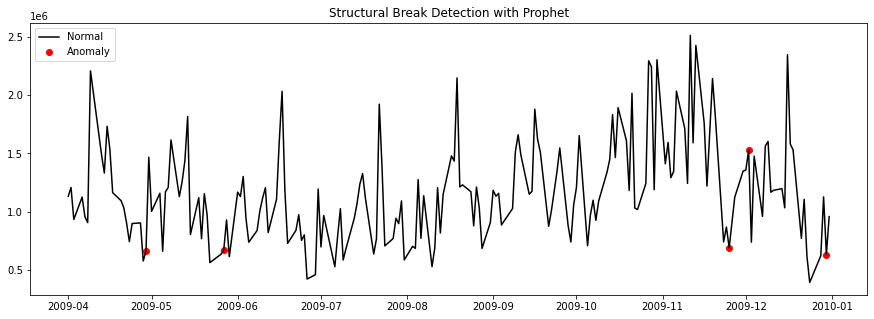

In [44]:
visualize_outliers(prophet_detection, 'Prophet', '2009-04-01', '2009-12-31') 

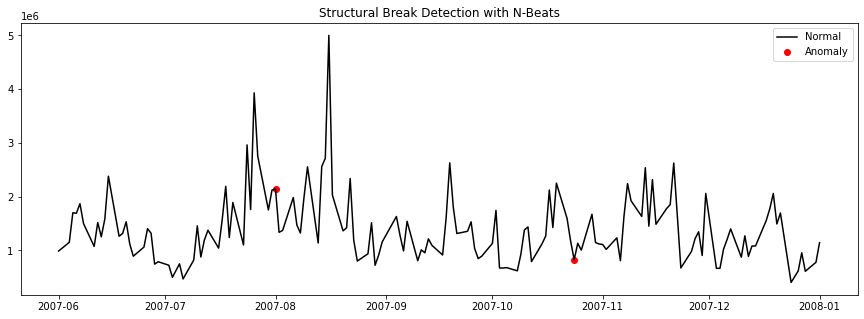

In [45]:
visualize_outliers(nbeats_detection, 'N-Beats', '2007-06-01', '2008-01-01') 

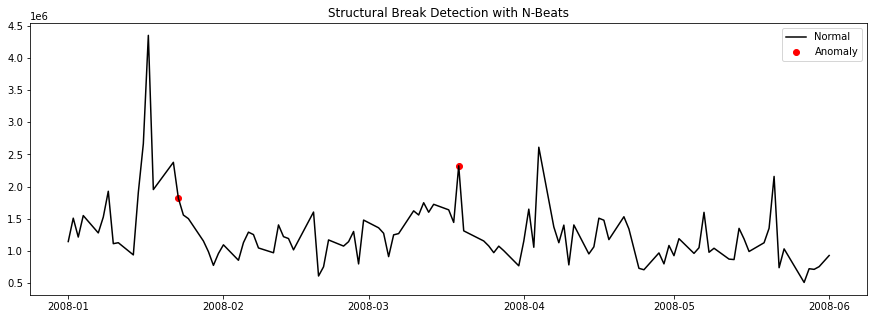

In [46]:
visualize_outliers(nbeats_detection, 'N-Beats', '2008-01-01', '2008-06-01') 

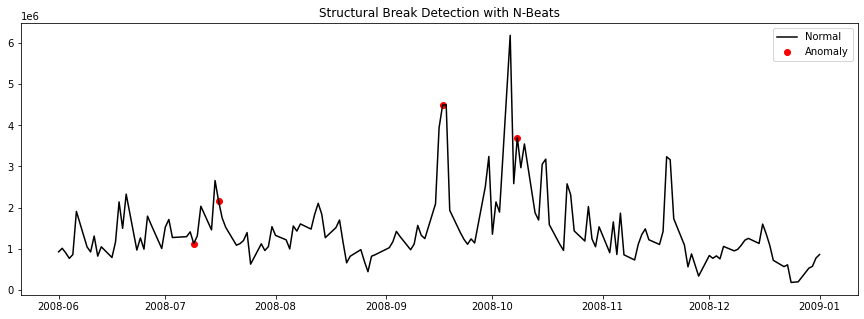

In [47]:
visualize_outliers(nbeats_detection, 'N-Beats', '2008-06-01', '2009-01-01') 

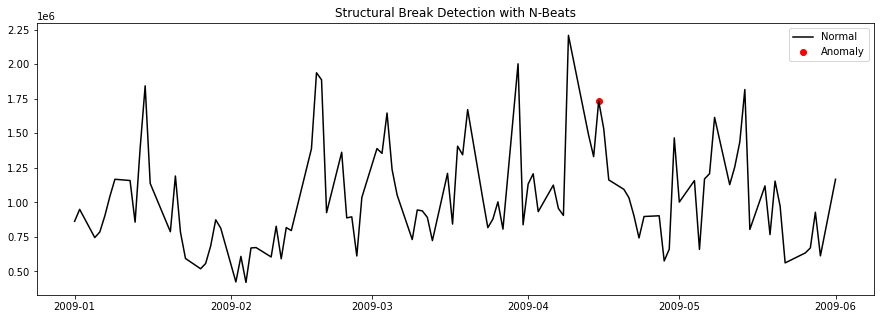

In [48]:
visualize_outliers(nbeats_detection, 'N-Beats', '2009-01-01', '2009-06-01') 

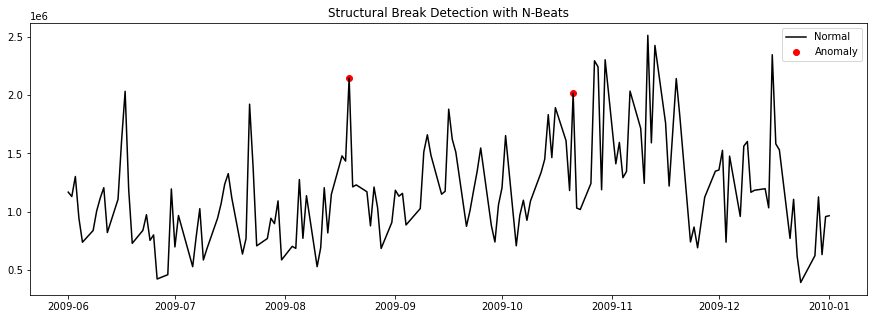

In [49]:
visualize_outliers(nbeats_detection, 'N-Beats', '2009-06-01', '2010-01-01') 

Calculate Precision

In [50]:
arima_28w_best_interval, arima_28w_best_precision

(20, 0.7)

In [51]:
ETS_28w_best_interval, ETS_28w_best_precision

(6, 0.7777777777777778)

In [52]:
prophet_28w_best_interval, prophet_28w_best_precision

(10, 0.8)

In [53]:
nbeats_28w_best_interval, nbeats_28w_best_precision

(8, 0.75)

In [54]:
wmape_28w_best_interval, wmape_28w_best_precision

(6, 0.75)